In [1]:
import pandas as pd
df_participate = pd.read_csv('participate_log.csv')
df_codeshare = pd.read_csv('codeshare_log.csv')
df_submission = pd.read_csv('submission_log.csv')
df_talk = pd.read_csv('talk_log.csv')

In [2]:
df_participate.head(2)
df_codeshare.head(2)
df_submission.head(2)
df_talk.head(2)

,ID,일자,토크 수,댓글 수,조회 수,공유 수,좋아요 수
0,ID_000,2018-08-16,1,1,2324,0,5
1,ID_000,2018-08-17,2,2,4729,0,9


In [35]:
from datetime import datetime

df_participate['일자'] = pd.to_datetime(df_participate['일자'])
df_participate['월별'] = df_participate['일자'].dt.to_period('M')
df_participate['월별'] = df_participate['월별'].astype(str)
df_participate.drop(['ID','일자'], axis = 1, inplace = True)

df_codeshare['일자'] = pd.to_datetime(df_codeshare['일자'])
df_codeshare['월별'] = df_codeshare['일자'].dt.to_period('M')
df_codeshare['월별'] = df_codeshare['월별'].astype(str)
df_codeshare.drop(['ID','일자'], axis = 1, inplace = True)


df_submission['일자'] = pd.to_datetime(df_submission['일자'])
df_submission['월별'] = df_submission['일자'].dt.to_period('M')
df_submission['월별'] = df_submission['월별'].astype(str)
df_submission.drop(['ID','일자'], axis = 1, inplace = True)

df_talk['일자'] = pd.to_datetime(df_talk['일자'])
df_talk['월별'] = df_talk['일자'].dt.to_period('M')
df_talk['월별'] = df_talk['월별'].astype(str)
df_talk.drop(['ID','일자'], axis = 1, inplace = True)

In [19]:
display(df_participate.head(2))
display(df_codeshare.head(2))
display(df_submission.head(2))
display(df_talk.head(2))

,참가자 수,월별
0,1,2018-08
1,1,2018-11


,코드 공유 수,댓글 수,조회 수,공유 수,다운로드 수,좋아요 수,월별
0,6,0,34237,11,0,50,2019-12
1,10,0,34568,11,0,50,2020-04


,제출 수,월별
0,2,2018-08
1,1,2018-08


,토크 수,댓글 수,조회 수,공유 수,좋아요 수,월별
0,1,1,2324,0,5,2018-08
1,2,2,4729,0,9,2018-08


In [36]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.family']

['Malgun Gothic']

# <span style="font-style:italic; font-weight:bold;font-family:serif; font-size:1.5em;line-height:1.5em;color:blue;">월별로 참가자 수, 공유 수의 변화는 어떠했는가?</span>

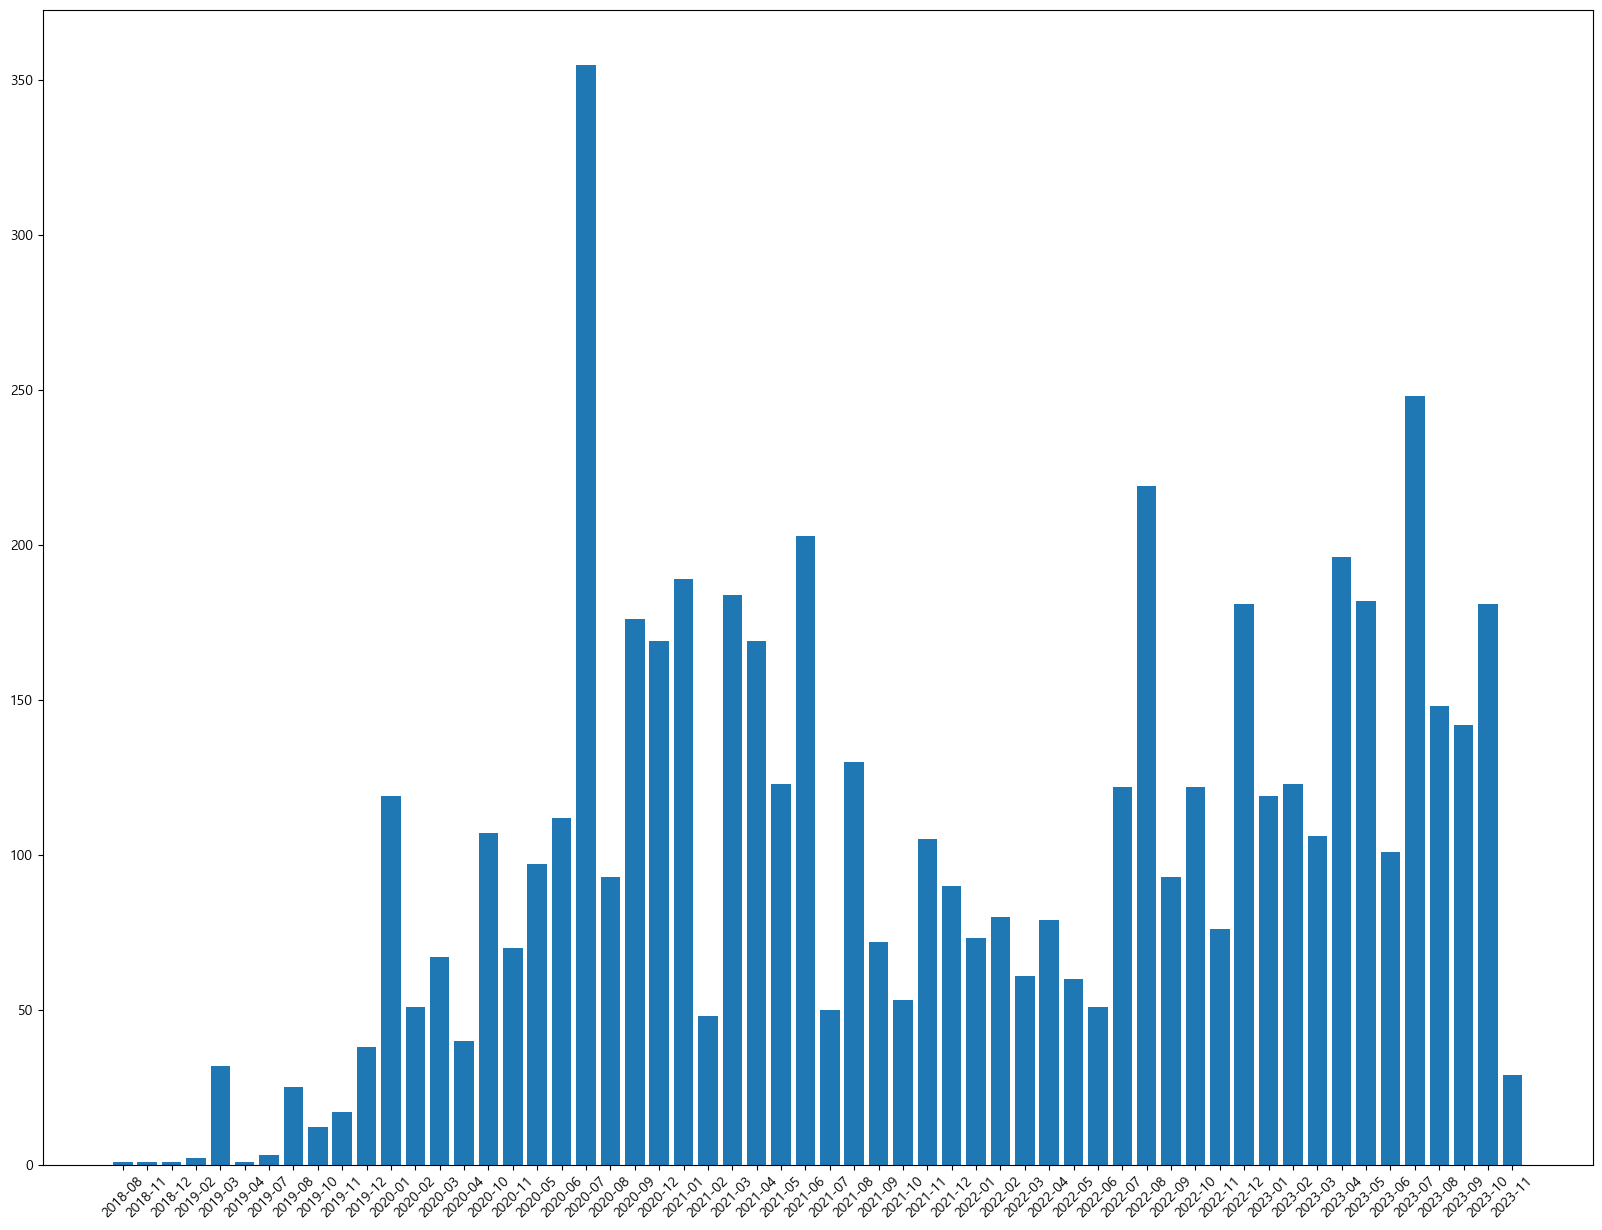

In [31]:
plt.figure(figsize = [20,15])
plt.bar(x = df_participate['월별'], height = df_participate['참가자 수'])
plt.xticks(rotation =45 )
plt.show()

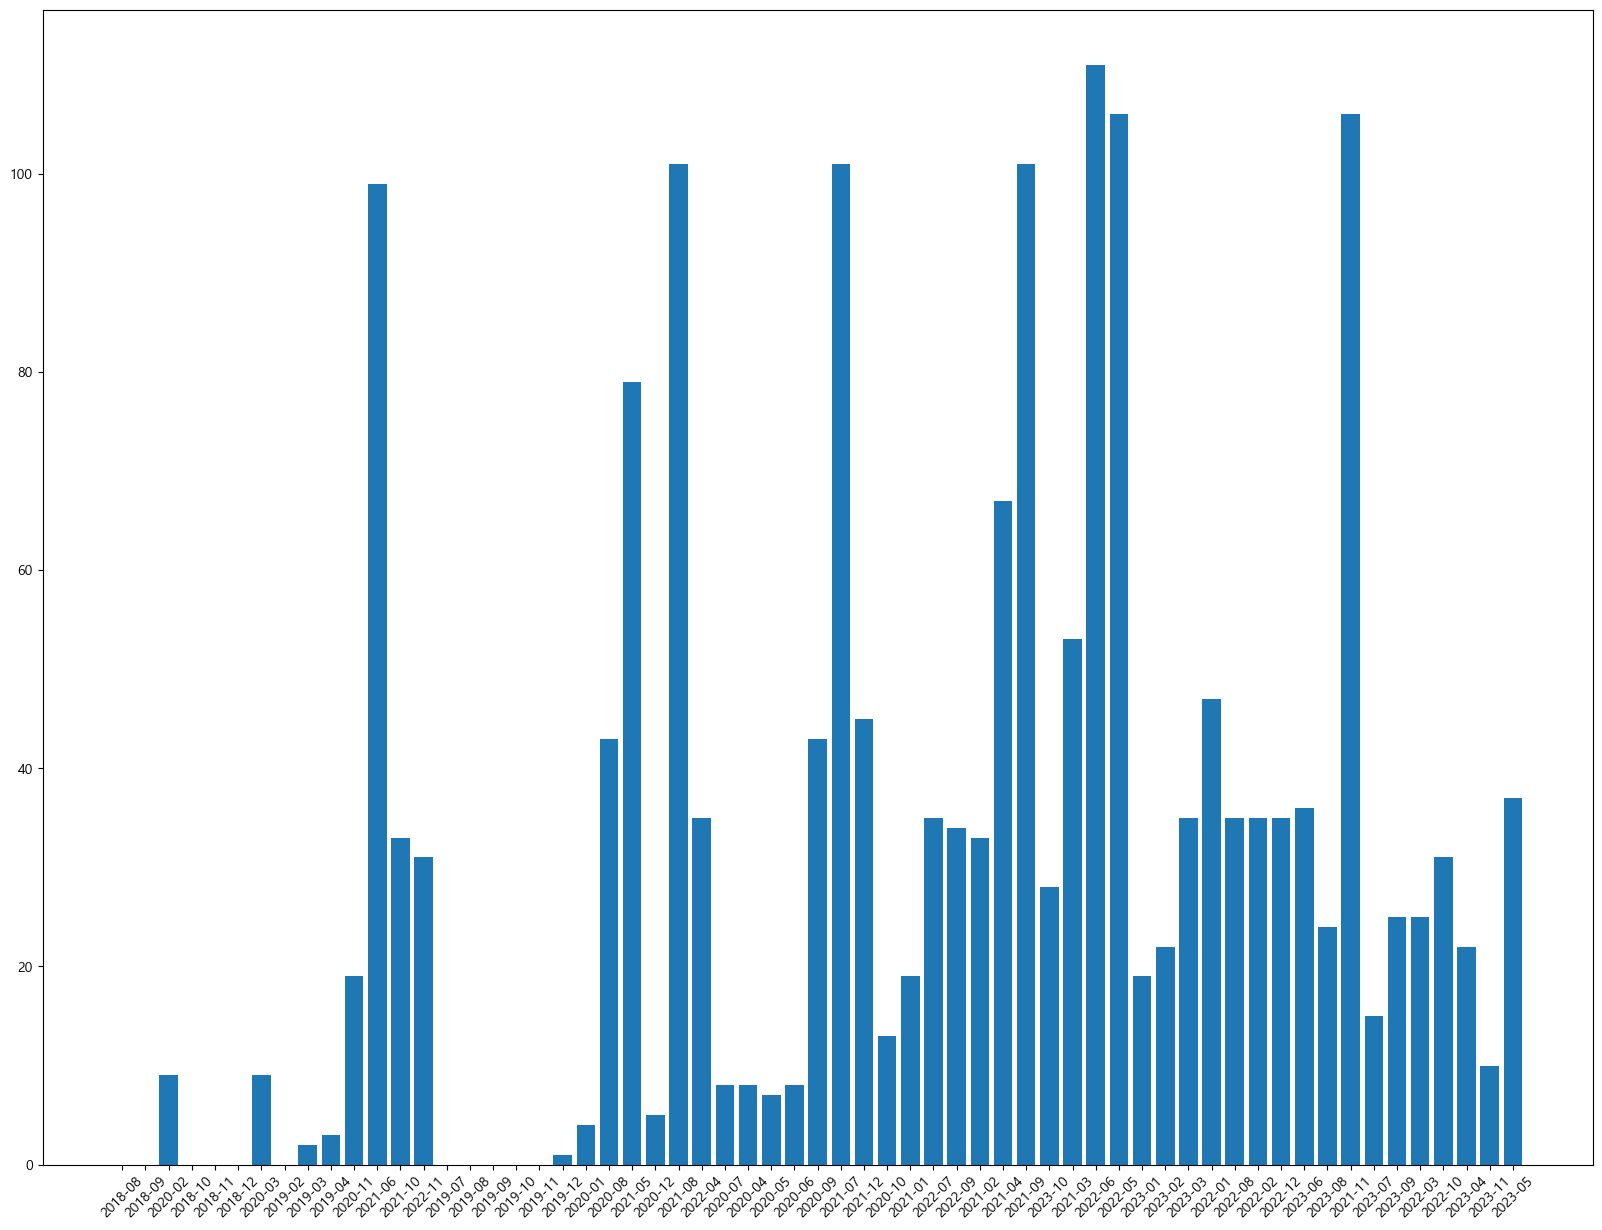

In [37]:
plt.figure(figsize = [20,15])
plt.bar(x = df_talk['월별'], height = df_talk['공유 수'])
plt.xticks(rotation =45 )
plt.show()

,월별,참가자 수
0,2018-08,1.0
1,2018-11,1.0
2,2018-12,1.0


,월별,공유 수
0,2018-08,0.0
1,2018-09,0.0
2,2018-10,0.0


,월별,참가자 수,공유 수
0,2018-08,1.0,0.0
1,2018-11,1.0,0.0
2,2018-12,1.0,0.0


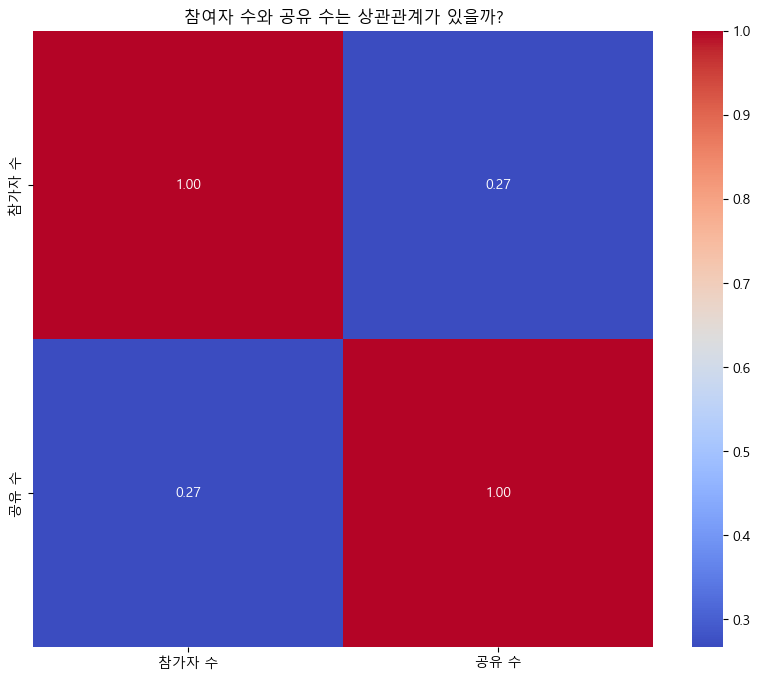

PearsonRResult(statistic=0.26715754965878924, pvalue=0.04262845724914294)

In [57]:
group_participate = df_participate.groupby(by = '월별', as_index = False)['참가자 수'].mean()
display(group_participate.head(3))

group_talk_share = df_talk.groupby(by = '월별', as_index = False)['공유 수'].mean()
display(group_talk_share.head(3))

group_part_share = pd.merge(group_participate, group_talk_share, on='월별', how='inner')
display(group_part_share.head(3))

import seaborn as sns

# 상관관계 히트맵 생성
group_part_share_matrix = group_part_share[['참가자 수', '공유 수']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(group_part_share_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('참여자 수와 공유 수는 상관관계가 있을까?')
plt.show()


import scipy.stats as spst
display(spst.pearsonr(group_part_share['참가자 수'], group_part_share['공유 수']))


# 참여자 수와 토론의 활성도는 상관관계가 있는가?

,월별,댓글 수,조회 수,공유 수,좋아요 수
0,2018-08,7.142857,14512.428571,0.0,22.571429
1,2018-09,21.363636,40802.727273,0.0,59.272727
2,2018-10,2.000000,6174.000000,0.0,8.500000


,월별,참가자 수,댓글 수,조회 수,공유 수,좋아요 수
0,2018-08,1.0,7.142857,14512.428571,0.0,22.571429
1,2018-11,1.0,4.000000,12677.000000,0.0,17.000000
2,2018-12,1.0,5.000000,15870.000000,0.0,22.000000


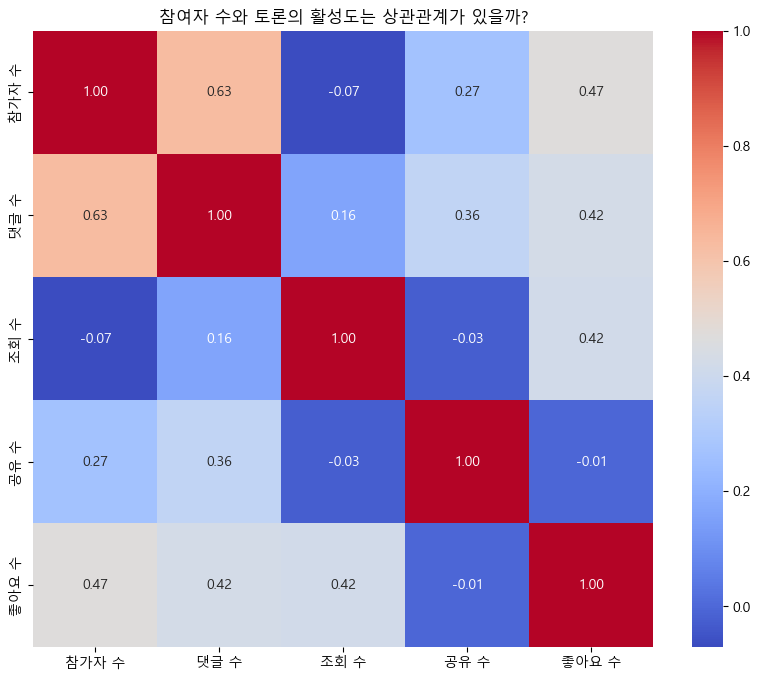

참가자 수 : 댓글 수


PearsonRResult(statistic=0.6298652609118359, pvalue=1.1755456562840462e-07)

참가자 수 : 조회 수


PearsonRResult(statistic=-0.07097437892490159, pvalue=0.5965095124137927)

참가자 수 : 공유 수


PearsonRResult(statistic=0.26715754965878924, pvalue=0.04262845724914294)

참가자 수 : 좋아요 수


PearsonRResult(statistic=0.4707864731819017, pvalue=0.00019181711327753877)

{'댓글 수': 1.1755456562840462e-07, '조회 수': 0.5965095124137927, '공유 수': 0.04262845724914294, '좋아요 수': 0.00019181711327753877}


In [72]:
group_talk = df_talk.groupby(by = '월별', as_index = False)[['댓글 수', '조회 수', '공유 수', '좋아요 수']].mean()
display(group_talk.head(3))

group_part_talk = pd.merge(group_participate, group_talk, on='월별', how='inner')
display(group_part_talk.head(3))

relation = {}

# 상관관계 히트맵 생성
group_part_talk_matrix = group_part_talk[['참가자 수','댓글 수', '조회 수', '공유 수', '좋아요 수']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(group_part_talk_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('참여자 수와 토론의 활성도는 상관관계가 있을까?')
plt.show()

import scipy.stats as spst
target = '참가자 수'
analyze_list = ['댓글 수', '조회 수', '공유 수', '좋아요 수']

for feature in analyze_list:
    print(f"{target} : {feature}")
    display(spst.pearsonr(group_part_talk[target], group_part_talk[feature]))
    relation[feature] = spst.pearsonr(group_part_talk[target], group_part_talk[feature])[1]

print(relation)

,월별,참가자 수
51,2023-05,28.066116
53,2023-07,26.482759
49,2023-03,25.750000
54,2023-08,23.723810
48,2023-02,23.241379
41,2022-07,22.252874
50,2023-04,22.149123
46,2022-12,22.093750
23,2021-01,22.058252
17,2020-07,20.710744


,월별,댓글 수,조회 수,공유 수,좋아요 수
0,2018-08,7.142857,14512.428571,0.000000,22.571429
1,2018-09,21.363636,40802.727273,0.000000,59.272727
2,2018-10,2.000000,6174.000000,0.000000,8.500000
3,2018-11,4.000000,12677.000000,0.000000,17.000000
4,2018-12,5.000000,15870.000000,0.000000,22.000000
5,2019-02,8.888889,23402.333333,0.000000,36.555556
6,2019-03,25.846154,71556.615385,1.923077,86.153846
7,2019-04,38.500000,112880.000000,2.500000,127.000000
8,2019-07,7.875000,20748.250000,0.000000,27.375000
9,2019-08,16.428571,40716.428571,0.000000,54.428571


,월별,참가자 수,댓글 수,조회 수,공유 수,좋아요 수
51,2023-05,28.066116,55.224138,17675.275862,9.517241,167.224138
53,2023-07,26.482759,67.263158,19446.982456,5.771930,102.964912
49,2023-03,25.750000,82.419355,27047.903226,5.193548,168.000000
54,2023-08,23.723810,52.266667,13815.213333,6.106667,79.093333
48,2023-02,23.241379,82.461538,18259.923077,7.384615,166.576923
41,2022-07,22.252874,27.511111,13583.911111,4.222222,65.377778
50,2023-04,22.149123,36.465517,15056.086207,5.758621,134.362069
46,2022-12,22.093750,35.500000,13393.717949,2.500000,81.756410
23,2021-01,22.058252,71.073394,81235.513761,3.394495,165.165138
17,2020-07,20.710744,59.736842,101746.986842,1.381579,205.802632


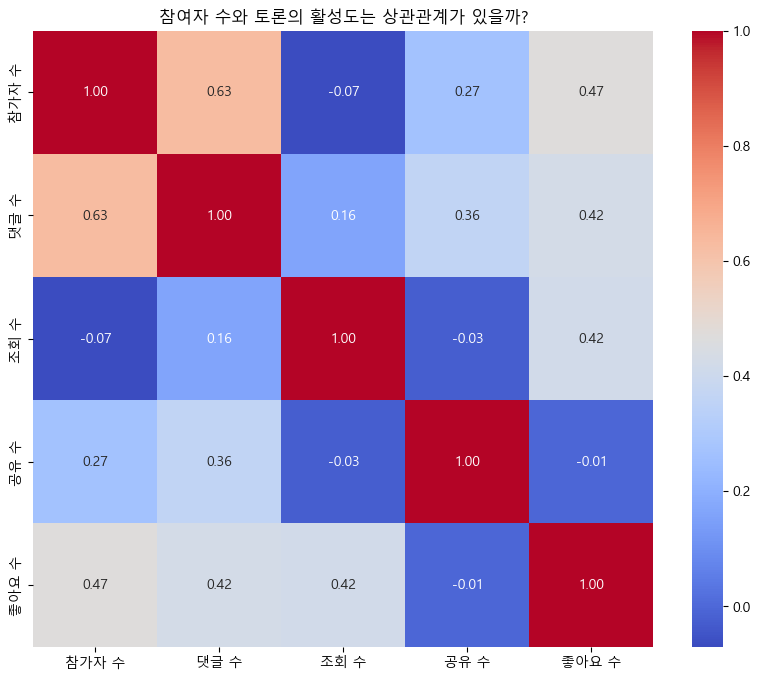

참가자 수 : 댓글 수


PearsonRResult(statistic=0.6298652609118359, pvalue=1.1755456562840462e-07)

참가자 수 : 조회 수


PearsonRResult(statistic=-0.07097437892490159, pvalue=0.5965095124137927)

참가자 수 : 공유 수


PearsonRResult(statistic=0.26715754965878924, pvalue=0.04262845724914294)

참가자 수 : 좋아요 수


PearsonRResult(statistic=0.4707864731819017, pvalue=0.00019181711327753877)

{'댓글 수': 1.1755456562840462e-07, '조회 수': 0.5965095124137927, '공유 수': 0.04262845724914294, '좋아요 수': 0.00019181711327753877}


In [7]:
import pandas as pd
df_participate = pd.read_csv('participate_log.csv')
df_codeshare = pd.read_csv('codeshare_log.csv')
df_submission = pd.read_csv('submission_log.csv')
df_talk = pd.read_csv('talk_log.csv')

from datetime import datetime

df_participate['일자'] = pd.to_datetime(df_participate['일자'])
df_participate['월별'] = df_participate['일자'].dt.to_period('M')
df_participate['월별'] = df_participate['월별'].astype(str)
df_participate.drop(['ID','일자'], axis = 1, inplace = True)


df_talk['일자'] = pd.to_datetime(df_talk['일자'])
df_talk['월별'] = df_talk['일자'].dt.to_period('M')
df_talk['월별'] = df_talk['월별'].astype(str)
df_talk.drop(['ID','일자'], axis = 1, inplace = True)

group_participate = df_participate.groupby(by = '월별', as_index = False)['참가자 수'].mean()
display(group_participate.sort_values(by = '참가자 수', ascending = False).head(10))

group_talk = df_talk.groupby(by = '월별', as_index = False)[['댓글 수', '조회 수', '공유 수', '좋아요 수']].mean()
display(group_talk.head(10))

group_part_talk = pd.merge(group_participate, group_talk, on='월별', how='inner')
display(group_part_talk.sort_values(by = '참가자 수',ascending = False).head(10))

relation = {}

import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.family']
import seaborn as sns

# 상관관계 히트맵 생성
group_part_talk_matrix = group_part_talk[['참가자 수','댓글 수', '조회 수', '공유 수', '좋아요 수']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(group_part_talk_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('참여자 수와 토론의 활성도는 상관관계가 있을까?')
plt.show()

import scipy.stats as spst
target = '참가자 수'
analyze_list = ['댓글 수', '조회 수', '공유 수', '좋아요 수']

for feature in analyze_list:
    print(f"{target} : {feature}")
    display(spst.pearsonr(group_part_talk[target], group_part_talk[feature]))
    relation[feature] = spst.pearsonr(group_part_talk[target], group_part_talk[feature])[1]

print(relation)